### Workflow

1. Overfit a the neural network from milestone 3.
  - There are ways to overfit your network, but for this milestone we want to over-train on the training data. See Chapter 6 of Grokking Deep Learning for more details.
2. Graph the training versus validation metrics prove overfitting.

In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.001)

In [174]:
def Create_Model(network_size):
  model = keras.models.Sequential([
    keras.layers.Dense(network_size, activation='relu', input_shape=[4]),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(network_size, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1)                                   
  ])
  
  opt = keras.optimizers.RMSprop()
  m = [
       "accuracy",
  ]
  l = keras.losses.MeanSquaredError()
  
  model.compile(loss=l, optimizer=opt, metrics=m)
  return model 

In [175]:
# This method will be used in place of the normal output. This is cleaner in my opinion
class PrintDoc(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print('.', end='')

In [176]:
column_names = ['Date','HomeTeam','HomeScore','AwayTeam','AwayScore',
                'HomeScoreAverage','HomeDefenseAverage','AwayScoreAverage','AwayDefenseAverage',
                'Result']

games_csv = 'Games-Calculated (2).csv'
all_data = pd.read_csv(games_csv, header=None, names=column_names)

# limiting to 2019 to overfit the data
all_data = all_data[all_data.Date.str.contains("2019")].reset_index(drop=True)
all_data.head()

Date              HomeTeam  ...  AwayDefenseAverage Result
0  2019-01-01         Virginia Tech  ...           73.000000     15
1  2019-01-01         Florida State  ...           84.000000     11
2  2019-01-01       San Diego State  ...           83.285714      5
3  2019-01-01            Washington  ...           81.375000      8
4  2019-01-02  South Carolina State  ...           74.222222     -2

[5 rows x 10 columns]

In [177]:
 # Drop the columns that we are NOT going to train on
all_data.drop(['Date','HomeTeam','HomeScore','AwayTeam','AwayScore'], axis=1, inplace=True)
all_data.tail()

#Break it into 80/20 splits
train = all_data.sample(frac=0.8, random_state=0)
test = all_data.drop(train.index)
print('Training Size: %s' % train.shape[0])
print('Testing Size: %s' % test.shape[0])

#Create the labels
train_labels = train.pop('Result')
test_labels = test.pop('Result')

# Normalize the data
mean = train.mean(axis=0)
train_data = train - mean
std = train_data.std(axis=0)
train_data /= std

test_data = test - mean
test_data /= std

Training Size: 2502
Testing Size: 626


In [204]:
bballmodel1 = Create_Model(256)
history1 = bballmodel1.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=0, callbacks=[PrintDoc()]) 


..........
..........
..........
..........
..........
..........
..........
..........
..........
..........

In [205]:
bballmodel2 = Create_Model(4)
history2 = bballmodel2.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=0, callbacks=[PrintDoc()]) 


..........
..........
..........
..........
..........
..........
..........
..........
..........
..........

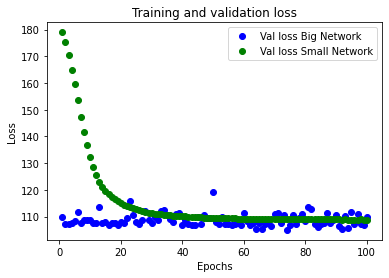

In [206]:
loss_values = history1.history['val_loss']
val_loss_values = history2.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Val loss Big Network')
plt.plot(epochs, val_loss_values, 'go', label='Val loss Small Network')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


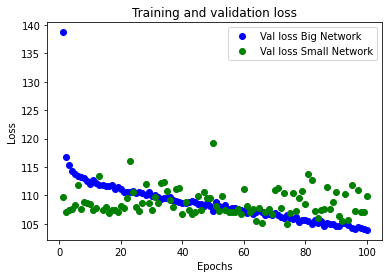

In [207]:
loss_values = history1.history['loss']
val_loss_values = history1.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Val loss Big Network')
plt.plot(epochs, val_loss_values, 'go', label='Val loss Small Network')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The bigger the network the less accurate it is. Comparing small and big networks you can see the big diffeence of loss.